# Лабораторна робота №3. Байєсівський класифікатор
## Виконав студент групи КМ-91мп
## Галета М.С.
## Завдання на лабораторну роботу
<img src="task.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Зчитування датасету

In [2]:
dataset = pd.read_csv('MP-04-Galeta.csv', sep=';',
                      names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'y'])
dataset.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,x,y,g,t,n,c,b,n,t,s,n,d,edible
1,x,f,n,t,n,c,b,n,t,s,n,d,edible
2,f,s,w,f,n,w,b,k,t,f,n,g,edible
3,f,y,w,t,p,c,n,p,e,s,n,g,poisonous
4,f,y,n,t,p,c,n,k,e,s,n,g,poisonous


## 1) Розділення датасету на тренувальну та тестову вибірки

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1].values,
                                                    dataset.iloc[:, -1].values,
                                                    test_size=0.4,
                                                    random_state=42)

In [4]:
def categories_words(x_train, y_train):
    """ Функція, яка повертає списки зі слів,
        що відносяться до відповідних класів """
   
    all_words_list = []
    edible_words_list = []
    poisonous_words_list = []
    
    for i, y in enumerate(y_train):
        if y == 'edible':
            edible_words_list += list(x_train[i])
        if y == 'poisonous':
            poisonous_words_list += list(x_train[i])
    all_words_list = set(edible_words_list + poisonous_words_list)
    
    return all_words_list, edible_words_list, poisonous_words_list

## 2) Побудова наївного байєсівського класифікатора

In [5]:
class NaiveBayesClassifier:
    def __init__(self, alpha):
        self.alpha = alpha
        
        self.train_set_x = None
        self.train_set_y = None
        
        self.all_words_list = []
        self.ham_words_list = []
        self.spam_words_list = []
    
    def fit(self, train_set_x, train_set_y):
        
        self.all_words_list, self.edible_words_list, self.poisonous_words_list = categories_words(train_set_x, train_set_y)
        
        self.edible_words_list = np.array(self.edible_words_list)
        self.poisonous_words_list = np.array(self.poisonous_words_list)
        self.theta_edible = {}
        self.theta_poisonous = {}
        k = len(self.all_words_list)
        n_p, n_e = len(self.poisonous_words_list), len(self.edible_words_list)
        unique_p, counts_p = np.unique(self.poisonous_words_list, return_counts=True)
        x_p = dict(zip(unique_p, counts_p))
        unique_e, counts_e = np.unique(self.edible_words_list, return_counts=True)
        x_e = dict(zip(unique_e, counts_e))
        
        for w in self.all_words_list:
            self.theta_edible[w] = (x_e.get(w, 0) + self.alpha) / (n_e + self.alpha * k)
            self.theta_poisonous[w] = (x_p.get(w, 0) + self.alpha) / (n_p + self.alpha * k)
        
        self.p_p = (train_set_y == 'poisonous').sum() / len(train_set_y)
        self.p_e = (train_set_y == 'edible').sum() / len(train_set_y)
        
    def predict(self, test_set_x):
        
        prediction = []
        for sent in test_set_x:
            pr_p = np.log(self.p_p)
            pr_e = np.log(self.p_e)
            for w in sent:
                if w in self.theta_poisonous:
                    pr_p += np.log(self.theta_poisonous.get(w, 1))
                if w in self.theta_edible:
                    pr_e += np.log(self.theta_edible.get(w, 1))
            prediction += ['poisonous' if pr_p >= pr_e else 'edible']
            
        return prediction

In [6]:
alpha = 1 # Коефіцієнт згладжування
nbc = NaiveBayesClassifier(alpha)
nbc.fit(X_train, y_train)

In [7]:
y_pred = np.array(nbc.predict(X_test))

## 3) Оцінка результату на тестовій вибірці

In [8]:
actual = list(y_test)
accuracy = (y_pred == y_test).mean()
print("Доля правильно вгаданих відповідей на тестовій вибірці:", accuracy, '%')

Доля правильно вгаданих відповідей на тестовій вибірці: 0.98 %


## 4) Графічне представлення результатів

In [9]:
y_test_plot = np.where(y_test == 'edible', 1, y_test)
y_test_plot = np.where(y_test_plot == 'poisonous', 2, y_test_plot)
y_pred_plot = np.where(y_pred == 'edible', 1, y_pred)
y_pred_plot = np.where(y_pred_plot == 'poisonous', 2, y_pred_plot).astype(int)

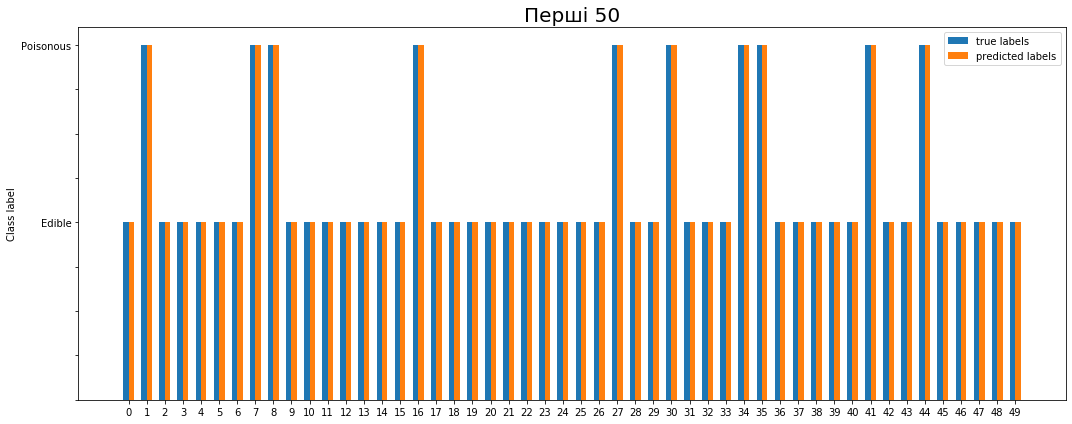

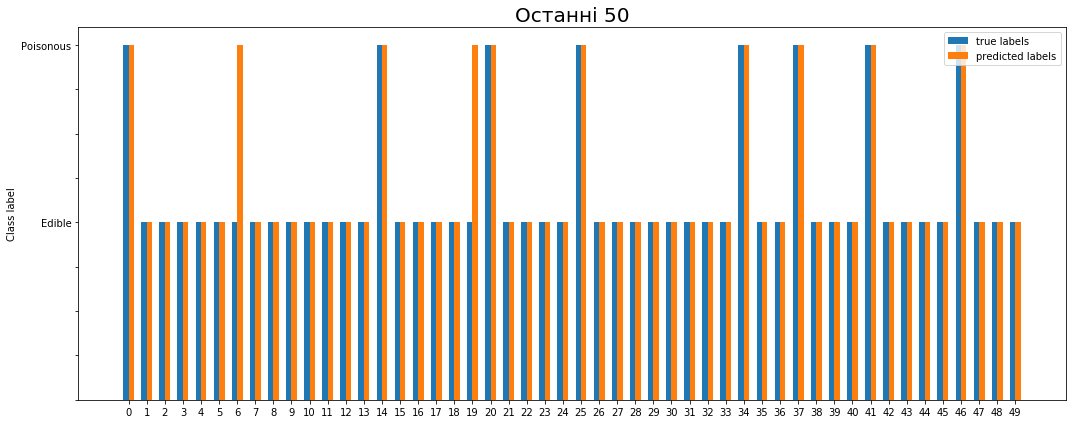

In [10]:
x = np.arange(len(y_test[:50]))
width = 0.3
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Перші 50", fontsize=20)
ax.bar(x - width/2, y_test_plot[:50], width, label='true labels')
ax.bar(x + width/2, y_pred_plot[:50], width, label='predicted labels')
ax.set_ylabel('Class label')
ax.set_xticks(x)
ax.set_yticklabels(('','','','','Edible','','','', 'Poisonous'))
ax.legend()
plt.tight_layout()

x = np.arange(len(y_test[50:]))
width = 0.3
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Останні 50", fontsize=20)
ax.bar(x - width/2, y_test_plot[50:], width, label='true labels')
ax.bar(x + width/2, y_pred_plot[50:], width, label='predicted labels')
ax.set_ylabel('Class label')
ax.set_xticks(x)
ax.set_yticklabels(('','','','','Edible','','','', 'Poisonous'))
ax.legend()
plt.tight_layout()

## Висновки
#### 1) Було збудовано наївний байєсівський класифікатор
#### 2) Класифікатор показує високу долю правильно вгаданих відповідей, помилився лише в 2-х випадках